In [1]:
import re
import requests
import pandas as pd
from urllib.parse import urlparse
import math
import numpy as np
from datetime import datetime
data_atual = datetime.today()

def pubhtml_to_csv(url_pubhtml: str) -> str:
    """
    Converte um URL .../pubhtml (com ou sem #gid=...) em .../pub?gid=...&single=true&output=csv
    Se o gid não estiver no URL, captura o primeiro gid do HTML publicado.
    """
    assert "/pubhtml" in url_pubhtml, "URL deve ser do tipo .../pubhtml"
    base_pub = url_pubhtml.split("/pubhtml")[0] + "/pub"

    # 1) tenta extrair gid do hash (#gid=...)
    m = re.search(r"#gid=(\d+)", url_pubhtml)
    if m:
        gid = m.group(1)
        return f"{base_pub}?gid={gid}&single=true&output=csv"

    # 2) caso não tenha gid explícito, baixa o HTML e pega o primeiro gid disponível
    html = requests.get(url_pubhtml).text
    # tenta capturar na navegação de abas (mais confiável)
    m2 = re.search(r'data-gid="(\d+)"', html)
    if m2:
        gid = m2.group(1)
        return f"{base_pub}?gid={gid}&single=true&output=csv"

    # fallback: captura qualquer gid que aparecer
    gids = re.findall(r'gid=(\d+)', html)
    if not gids:
        raise ValueError("Não foi possível encontrar 'gid' no HTML publicado.")
    gid = gids[0]
    return f"{base_pub}?gid={gid}&single=true&output=csv"

def read_csv_smart(url_csv: str) -> pd.DataFrame:
    """
    Tenta ler CSV com separador padrão (vírgula) e, se falhar, tenta ponto-e-vírgula.
    """
    try:
        return pd.read_csv(url_csv)
    except Exception:
        return pd.read_csv(url_csv, sep=';')

# ---- cole seus links pubhtml aqui ----
aba1_pubhtml = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSa06AfYC_ufn2vqTsYZkeyX7QvNwYH2gdH8VPcZOCS8_pyOJzTOtU3tufy_OL5sWhVvW_qm3mBpWJr/pubhtml"
aba2_pubhtml = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSa06AfYC_ufn2vqTsYZkeyX7QvNwYH2gdH8VPcZOCS8_pyOJzTOtU3tufy_OL5sWhVvW_qm3mBpWJr/pubhtml#gid=1491485366"

# Converte para CSV
aba1_csv = pubhtml_to_csv(aba1_pubhtml)
aba2_csv = pubhtml_to_csv(aba2_pubhtml)
print("CSV aba 1:", aba1_csv)
print("CSV aba 2:", aba2_csv)

# Lê os DataFrames
df1 = read_csv_smart(aba1_csv)
df2 = read_csv_smart(aba2_csv)

# Inspeciona
print("\n=== ABA 1 ===")
print(df1.shape)
df1.head(5)



# (Opcional) unificar se as colunas forem iguais
# df_unido = pd.concat([df1, df2], ignore_index=True)
# df_unido.to_csv("pedidos_unificados.csv", index=False)


CSV aba 1: https://docs.google.com/spreadsheets/d/e/2PACX-1vSa06AfYC_ufn2vqTsYZkeyX7QvNwYH2gdH8VPcZOCS8_pyOJzTOtU3tufy_OL5sWhVvW_qm3mBpWJr/pub?gid=1245430875&single=true&output=csv
CSV aba 2: https://docs.google.com/spreadsheets/d/e/2PACX-1vSa06AfYC_ufn2vqTsYZkeyX7QvNwYH2gdH8VPcZOCS8_pyOJzTOtU3tufy_OL5sWhVvW_qm3mBpWJr/pub?gid=1491485366&single=true&output=csv

=== ABA 1 ===
(744, 14)


,Data,Semana,Cliente,Endereco,Telefone,Região,NIF,Quantidade (pães),Tipo (Fresco/MAP),Canal,Valor Unitário (€),Valor Total (€),Status (enviado/entregue/preparando),Pagamento (Pago/Deve)
0,17/01/2025,3,Alessandra,NaN,NaN,NaN,NaN,10,ATM,Aninha,"0,7",7,NaN,Pago
1,17/01/2025,3,Aninha,NaN,NaN,NaN,NaN,20,ATM,Aninha,"0,7",14,NaN,Pago
2,17/01/2025,3,Diego e Bia,NaN,NaN,NaN,NaN,10,ATM,Aninha,"0,7",7,NaN,Pago
3,17/01/2025,3,Franciele,NaN,NaN,NaN,NaN,20,ATM,Aninha,"0,7",14,NaN,Pago
4,17/01/2025,3,Josimar,NaN,NaN,NaN,NaN,10,ATM,Aninha,"0,7",7,NaN,Pago


In [2]:
df1.tail(5)

,Data,Semana,Cliente,Endereco,Telefone,Região,NIF,Quantidade (pães),Tipo (Fresco/MAP),Canal,Valor Unitário (€),Valor Total (€),Status (enviado/entregue/preparando),Pagamento (Pago/Deve)
739,20/10/2025,43,NACEX,NaN,NaN,NaN,NaN,120,ATM,NACEX,"0,45",54,NaN,Pago
740,20/10/2025,43,Mercadim,NaN,NaN,NaN,NaN,50,ATM,Bia,"0,5",25,NaN,Pago
741,21/10/2025,43,NACEX,NaN,NaN,NaN,NaN,120,ATM,NACEX,"0,45",54,NaN,Pago
742,21/10/2025,43,Loja,NaN,NaN,NaN,NaN,17,ATM,Loja,"0,5","8,5",NaN,Pago
743,21/10/2025,43,Mercado,NaN,NaN,NaN,NaN,60,ATM,Bia,"0,5",30,NaN,Pago


In [3]:
print("\n=== ABA 2 ===")
print(df2.shape)
df2.tail(5)



=== ABA 2 ===
(1, 4)


,Semana,Canal,Pães,Receita (€)
0,#VALUE!,NaN,NaN,NaN


In [4]:
# cozinha = maio
# caucao = 1500
# paula = junho 
# caixa = 4000
# forno novo = 2200 + 23%*2200
# #forno novo = aumentar de 70 para 120 paes por vez
# vender MAP = 10/10


In [5]:


# ================================
# PARÂMETROS (ajuste se necessário)
# ================================
custo_ingredientes_pao = 0.05  # só ingredientes (€/pão)

# Embalagem/rotulagem por saco (10 pães)
paes_por_saco = 10
custo_etiqueta_por_saco = 0.02
caixa_boa_turma = 0.0  # se usar
custo_saco_fresco = 0.07
custo_saco_map = 0.17  # ajuste se diferente


# GÁS MAP — use (A) valor direto por saco OU (B) derive do lote:
custo_map_gas_por_saco = None     # ex.: 0.17 se quiser fixo. Se None, derivamos abaixo
custo_map_lote = 255.0
semanas_lote_map = 3
producao_semanal_prevista = 5000  # pães

if custo_map_gas_por_saco is None:
    sacos_semana = producao_semanal_prevista / paes_por_saco
    custo_map_gas_por_saco = custo_map_lote / (semanas_lote_map * sacos_semana)

# Comissão e preços por canal (fallback)
PRECO_CANAL = {"Aninha": 0.70, "Retirada": 0.50, "Boa Turma": 0.40, "Outros cafés": 0.50, "NACEX": 0.45}
COMISSAO_CANAL = {"Aninha": 0.20, "Retirada": 0.00, "Boa Turma": 0.00, "Outros cafés": 0.00, "NACEX": 0.00}

# NACEX — rateio por pedido
sacos_por_caixa = 7
paes_por_caixa = paes_por_saco * sacos_por_caixa  # 70
custo_frete_caixa_ate_10kg = 5.50
custo_caixa_transporte = 2.02
custo_nacex_por_caixa = custo_frete_caixa_ate_10kg + custo_caixa_transporte  # 7.52 €/caixa


morada_cozinha = "Rua Bento Gonçalves 17, Charneca da Caparica, 2820-638"

# --- Investimentos e Caixa ---

investimento_inicial = 15000
caucao_cozinha = 1500  #ja ta pago do caixa do pao francers, tem q arrumar
forno_novo_base = 2200
forno_novo_iva = 0.23 * forno_novo_base
forno_novo_total = forno_novo_base + forno_novo_iva  #vai sair do caixa da empresa tambem
caixa_atual = 0
investimento_total = investimento_inicial + caucao_cozinha + forno_novo_total



# --- Custos Fixos Mensais ---
# --- Custos Fixos Mensais ---
custos_fixos_maio = {
    "aluguel": 500,
    "agua": 50,
    "luz": 150
}
custos_fixos_junho_em_diante = {
    "aluguel": 500,
    "agua": 50,
    "luz": 150
    #"salario_paula": 800
}

def custos_fixos_mensais(data: str | datetime) -> float:
    """
    Retorna o total de custos fixos para um determinado mês/ano.
    Aceita data no formato 'YYYY-MM' ou objeto datetime.
    """
    if isinstance(data, str):
        data = datetime.strptime(data, "%Y-%m")

    # Janeiro a Abril 2025: sem cozinha
    if data < datetime(2025, 5, 1):
        return 0.0
    # Maio 2025: cozinha iniciada, sem Paula
    elif datetime(2025, 5, 1) <= data < datetime(2025, 6, 1):
        return sum(custos_fixos_maio.values())
    # Junho 2025 em diante: inclui Paula
    else:
        return sum(custos_fixos_junho_em_diante.values())
   
data_corte_forno_novo = datetime(2025, 10, 20)
# --- Produção / Processo ---
processo = {
    "mistura_massa_min": 15,
    "corte_bolinhas_min": 20,
    "fermentacao_min": 70,
    "forno_min": 15,
    "resfriar_min": 15,
    "ensacar_min": 5,
    "paes_por_batelada": 120 if data_atual >= data_corte_forno_novo else 70,  # se quiser ajustar dinamicamente
    "sacos_por_batelada": 12 if data_atual >= data_corte_forno_novo else 7
}

jornada_horas = (8.5, 17.5)  # das 08:30 às 17:30

# --- Cronograma Semanal ---
cronograma = {
    "segunda": "produção Lisboa (entrega quarta)",
    "terça": "produção Lisboa (entrega quarta)",
    "quarta": "produção Cascais (entrega sexta)",
    "quinta": "produção Cascais (entrega sexta)",
    "sexta": "produção NACEX (envios nacionais)"
}

# --- Estoque / Insumos ---
ingredientes = {
    "farinha_trigo": {"custo_kg": 0.46, "unidade": "25 kg", "iva": 0.06},
    "sal": {"custo_kg": 0.0, "unidade": "10 kg"}
}

# ================================
# HELPERS (não alteram df1)
# ================================
def normaliza_tipo(tipo: str) -> str:
    t = str(tipo).strip().upper()
    if t.startswith("MAP") or t.startswith("ATM"):
        return "MAP"
    return "FRESCO"



data_inicio_map = datetime(2025, 10, 20)  # data real de início do MAP

def custo_embalagem_por_pao(tipo: str, data_pedido: str | datetime) -> float:
    """
    Calcula o custo de embalagem + gás por pão, ajustando automaticamente
    se a data for anterior ao início do MAP real (usa custo de congelado).
    """
    # normaliza tipo
    t = str(tipo).strip().upper()

    # converte data se vier como string
    if isinstance(data_pedido, str):
        try:
            data_pedido = pd.to_datetime(data_pedido, errors='coerce')
        except:
            data_pedido = None

    # === regra especial: se for antes do início do MAP, trata como congelado ===
    if t.startswith("MAP") or t.startswith("ATM"):
        if data_pedido is not None and data_pedido < data_inicio_map:
            # ainda não usava MAP → custo de congelado
            emb_saco = custo_saco_fresco
            gas = 0.0
        else:
            # MAP real → custo de saco MAP + gás
            emb_saco = custo_saco_map
            gas = custo_map_gas_por_saco
    else:
        emb_saco = custo_saco_fresco
        gas = 0.0

    return (custo_etiqueta_por_saco + emb_saco) / paes_por_saco + (gas / paes_por_saco)

def custo_nacex_por_pao(qtd_paes: int) -> float:
    if qtd_paes <= 0:
        return 0.0
    n_caixas = math.ceil(qtd_paes / paes_por_caixa)
    return (n_caixas * custo_nacex_por_caixa) / qtd_paes

def custo_logistica_por_pao(canal: str, qtd_paes: int) -> float:
    canal = str(canal).strip()
    comissao = COMISSAO_CANAL.get(canal, 0.0)
    if canal == "NACEX":
        return comissao + custo_nacex_por_pao(qtd_paes)
    return comissao

def preco_unitario_fallback(canal: str):
    return PRECO_CANAL.get(str(canal).strip(), np.nan)

def to_float_locale(x):
    if isinstance(x, str):
        x = x.replace('.', '').replace(',', '.')
    try:
        return float(x)
    except:
        return np.nan

def construir_df_costed(df1: pd.DataFrame) -> pd.DataFrame:
    d = df1.copy(deep=True)  # NÃO altera df1

    # 1) Normaliza numéricos
    for col in ["Quantidade (pães)", "Valor Unitário (€)", "Valor Total (€)"]:
        if col in d.columns:
            d[col] = d[col].apply(to_float_locale)

    # 2) Preenche e tipa colunas-chave
    # Quantidade: NaN -> 0; tipa como Int64 (aceita NaN), depois usa .fillna(0)
    if "Quantidade (pães)" in d.columns:
        d["Quantidade (pães)"] = pd.to_numeric(d["Quantidade (pães)"], errors="coerce").fillna(0)
        # para o apply, vamos trabalhar com int seguro:
        qtd_int = d["Quantidade (pães)"].round().astype(int)
    else:
        # Se não existir, cria para não quebrar
        d["Quantidade (pães)"] = 0
        qtd_int = d["Quantidade (pães)"].astype(int)

    # Tipo/Canal: evita NaN em funções downstream
    if "Tipo (Fresco/MAP)" in d.columns:
        d["Tipo (Fresco/MAP)"] = d["Tipo (Fresco/MAP)"].fillna("Fresco")
    else:
        d["Tipo (Fresco/MAP)"] = "Fresco"

    if "Canal" in d.columns:
        d["Canal"] = d["Canal"].fillna("Desconhecido")
    else:
        d["Canal"] = "Desconhecido"

    # 3) Preço unitário: usa coluna se presente/numérica, senão fallback do canal
    if "Valor Unitário (€)" in d.columns and d["Valor Unitário (€)"].notna().any():
        preco_unit = d["Valor Unitário (€)"]
    else:
        preco_unit = d["Canal"].map(preco_unitario_fallback)

    # 4) Custos por linha (pedido) — seguros contra NaN
    emb_unit = d.apply(lambda r: custo_embalagem_por_pao(r["Tipo (Fresco/MAP)"], r["Data"]), axis=1)


    # Para evitar o int(NaN) no apply, usamos a série qtd_int já sanitizada
    d["_qtd_int_safe"] = qtd_int
    log_unit = d.apply(lambda r: custo_logistica_por_pao(r["Canal"], int(r["_qtd_int_safe"])), axis=1)

    # 5) Métricas
    d["Custo €/pão"] = custo_ingredientes_pao + emb_unit + log_unit
    d["Preço €/pão"] = preco_unit
    d["Margem €/pão"] = d["Preço €/pão"] - d["Custo €/pão"]
    d["Margem %"] = np.where(d["Preço €/pão"].notna() & (d["Preço €/pão"] != 0),
                             (d["Margem €/pão"] / d["Preço €/pão"]) * 100, np.nan)
    d["Margem €/pedido"] = d["Margem €/pão"] * d["Quantidade (pães)"]

    # 6) Limpeza de coluna auxiliar
    d = d.drop(columns=["_qtd_int_safe"])

    return d

df_costed = construir_df_costed(df1)
# ================================
# 📊 RESUMO SEMANAL — VENDAS E RECEITA GERAL
# ================================

resumo_semanal = (
    df_costed.groupby("Semana")[["Quantidade (pães)", "Valor Total (€)", "Margem €/pedido"]]
    .sum()
    .reset_index()
    .sort_values("Semana")
)

# Cálculo de métricas adicionais
resumo_semanal["Preço médio €/pão"] = resumo_semanal["Valor Total (€)"] / resumo_semanal["Quantidade (pães)"]
resumo_semanal["Margem média €/pão"] = resumo_semanal["Margem €/pedido"] / resumo_semanal["Quantidade (pães)"]
resumo_semanal["Margem média %"] = resumo_semanal["Margem média €/pão"] / resumo_semanal["Preço médio €/pão"] * 100

# Crescimento semana a semana (Δ%)
resumo_semanal["Δ Receita (%)"] = resumo_semanal["Valor Total (€)"].pct_change() * 100
resumo_semanal["Δ Pães (%)"] = resumo_semanal["Quantidade (pães)"].pct_change() * 100
resumo_semanal["Δ Margem (€) (%)"] = resumo_semanal["Margem €/pedido"].pct_change() * 100

display(resumo_semanal)


# ================================
# 📈 CRESCIMENTO SEMANAL POR CANAL
# ================================

resumo_canal_semana = (
    df_costed.groupby(["Semana", "Canal"])[["Quantidade (pães)", "Valor Total (€)", "Margem €/pedido"]]
    .sum()
    .reset_index()
    .sort_values(["Canal", "Semana"])
)

# Crescimento percentual por canal
resumo_canal_semana["Δ Receita Canal (%)"] = (
    resumo_canal_semana.groupby("Canal")["Valor Total (€)"].pct_change() * 100
)
resumo_canal_semana["Δ Pães Canal (%)"] = (
    resumo_canal_semana.groupby("Canal")["Quantidade (pães)"].pct_change() * 100
)

display(resumo_canal_semana)


# ================================
# 💰 MARGEM MÉDIA POR CANAL (CONSOLIDADA)
# ================================

resumo_canal = (
    df_costed.groupby("Canal")[["Quantidade (pães)", "Valor Total (€)", "Margem €/pedido"]]
    .sum()
    .reset_index()
)

# Cálculos
resumo_canal["Preço médio €/pão"] = resumo_canal["Valor Total (€)"] / resumo_canal["Quantidade (pães)"]
resumo_canal["Margem média €/pão"] = resumo_canal["Margem €/pedido"] / resumo_canal["Quantidade (pães)"]
resumo_canal["Margem média %"] = resumo_canal["Margem média €/pão"] / resumo_canal["Preço médio €/pão"] * 100

# Ordenar do mais lucrativo pro menos
resumo_canal = resumo_canal.sort_values("Margem média %", ascending=False).reset_index(drop=True)

display(resumo_canal)


C:\Users\hmatr\AppData\Local\Temp\ipykernel_16992\3122544135.py:136: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_pedido = pd.to_datetime(data_pedido, errors='coerce')


,Semana,Quantidade (pães),Valor Total (€),Margem €/pedido,Preço médio €/pão,Margem média €/pão,Margem média %,Δ Receita (%),Δ Pães (%),Δ Margem (€) (%)
0,3,150.0,105.0,66.150,0.700000,0.441000,63.000000,NaN,NaN,NaN
1,4,230.0,161.0,101.430,0.700000,0.441000,63.000000,53.333333,53.333333,53.333333
2,5,300.0,210.0,132.300,0.700000,0.441000,63.000000,30.434783,30.434783,30.434783
3,6,230.0,161.0,101.430,0.700000,0.441000,63.000000,-23.333333,-23.333333,-23.333333
4,7,600.0,420.0,264.600,0.700000,0.441000,63.000000,160.869565,160.869565,160.869565
5,8,520.0,364.0,229.320,0.700000,0.441000,63.000000,-13.333333,-13.333333,-13.333333
6,9,430.0,301.0,189.630,0.700000,0.441000,63.000000,-17.307692,-17.307692,-17.307692
7,10,520.0,364.0,229.320,0.700000,0.441000,63.000000,20.930233,20.930233,20.930233
8,11,1150.0,805.0,507.150,0.700000,0.441000,63.000000,121.153846,121.153846,121.153846
9,12,595.0,416.5,262.395,0.700000,0.441000,63.000000,-48.260870,-48.260870,-48.260870


,Semana,Canal,Quantidade (pães),Valor Total (€),Margem €/pedido,Δ Receita Canal (%),Δ Pães Canal (%)
0,3,Aninha,150.0,105.0,66.15,NaN,NaN
1,4,Aninha,230.0,161.0,101.43,53.333333,53.333333
2,5,Aninha,300.0,210.0,132.30,30.434783,30.434783
3,6,Aninha,230.0,161.0,101.43,-23.333333,-23.333333
4,7,Aninha,600.0,420.0,264.60,160.869565,160.869565
...,...,...,...,...,...,...,...
28,28,Vitória,20.0,10.0,8.82,0.000000,0.000000
31,29,Vitória,20.0,10.0,8.82,0.000000,0.000000
34,31,Vitória,40.0,20.0,17.64,100.000000,100.000000
37,32,Vitória,20.0,10.0,8.82,-50.000000,-50.000000


,Canal,Quantidade (pães),Valor Total (€),Margem €/pedido,Preço médio €/pão,Margem média €/pão,Margem média %
0,Vitória,410.0,205.0,180.810,0.50,0.441000,88.200000
1,Recolha,30.0,15.0,13.230,0.50,0.441000,88.200000
2,Loja,83.0,41.5,36.144,0.50,0.435470,87.093976
3,Boa Turma,4192.0,1676.8,1429.472,0.40,0.341000,85.250000
4,Bia,110.0,55.0,45.540,0.50,0.414000,82.800000
5,Aninha,16095.0,11266.5,7079.535,0.70,0.439859,62.837039
6,NACEX,550.0,247.5,73.210,0.45,0.133109,29.579798


In [6]:
# ================================
# 📊 BASE MENSAL ÚNICA — COMERCIAL + FINANCEIRA
# ================================

df_costed["Data"] = pd.to_datetime(df_costed["Data"], errors="coerce")
df_costed["Ano_Mês"] = df_costed["Data"].dt.to_period("M").astype(str)

# 1️⃣ Premissas financeiras
vida_util_meses = 60               # 5 anos de depreciação
depreciacao_mensal = investimento_total / vida_util_meses
caixa_inicial = 0.0                # começa em zero até confirmação real
caixa_minimo = 5000                # reserva mínima
percentual_pagamento_lucro = 0.30  # 30% do lucro líquido destinado a pagar investimento

# 2️⃣ Agrupar tudo por mês e canal
df_mensal = (
    df_costed.groupby(["Ano_Mês", "Canal"])[["Quantidade (pães)", "Valor Total (€)", "Margem €/pedido"]]
    .sum()
    .reset_index()
    .rename(columns={
        "Valor Total (€)": "Receita (€)",
        "Margem €/pedido": "Margem Bruta (€)"
    })
)

# 3️⃣ Custos fixos — aplicados uma vez por mês
custos_fixos = (
    df_mensal[["Ano_Mês"]]
    .drop_duplicates()
    .assign(Custos_Fixos=lambda d: d["Ano_Mês"].apply(custos_fixos_mensais))
)

# 4️⃣ Adicionar custos fixos no df_mensal
df_mensal = df_mensal.merge(custos_fixos, on="Ano_Mês", how="left")

# 5️⃣ Calcular lucros (dividindo custos fixos e depreciação proporcionalmente entre canais)
n_canais = df_mensal["Canal"].nunique()
df_mensal["Lucro Caixa (€)"] = df_mensal["Margem Bruta (€)"] - (df_mensal["Custos_Fixos"] / n_canais)
df_mensal["Depreciação (€)"] = depreciacao_mensal / n_canais
df_mensal["Lucro Contábil (€)"] = df_mensal["Lucro Caixa (€)"] - df_mensal["Depreciação (€)"]

# 6️⃣ Criar o total mensal (sem canal) — consolidado financeiro
df_mensal_total = (
    df_mensal.groupby("Ano_Mês")[["Receita (€)", "Margem Bruta (€)", "Lucro Caixa (€)", "Lucro Contábil (€)"]]
    .sum()
    .reset_index()
)

df_mensal_total["Custos Fixos (€)"] = df_mensal_total["Ano_Mês"].apply(custos_fixos_mensais)
df_mensal_total["Depreciação (€)"] = depreciacao_mensal

# 7️⃣ Calcular o caixa acumulado
df_mensal_total["Caixa Acumulado (€)"] = caixa_inicial + df_mensal_total["Lucro Caixa (€)"].cumsum()

# ================================
# 💵 AJUSTE MANUAL DE CAIXA (SE HOUVER DADOS REAIS)
# ================================

# Exemplo: dicionário com valores reais confirmados do banco
# ➤ Substitua com dados reais conforme forem conhecidos
# Exemplo: {"2025-09": 1234.50}
caixa_real_banco = {
     #"2025-09": 1234.50,
}

# Verifica e ajusta
if caixa_real_banco:
    for mes, valor_real in caixa_real_banco.items():
        if mes in df_mensal_total["Ano_Mês"].values:
            idx = df_mensal_total.index[df_mensal_total["Ano_Mês"] == mes][0]
            caixa_calculado = df_mensal_total.loc[idx, "Caixa Acumulado (€)"]

            # Se valor real for diferente do calculado, ajusta e propaga
            if abs(valor_real - caixa_calculado) > 1:
                diferenca = valor_real - caixa_calculado
                df_mensal_total.loc[idx:, "Caixa Acumulado (€)"] += diferenca
                print(f"⚠️ Ajuste manual aplicado: caixa em {mes} alterado para €{valor_real:,.2f} "
                      f"(diferença de €{diferenca:+.2f}). Valores seguintes recalculados.")
        else:
            print(f"⚠️ Mês '{mes}' não encontrado no DataFrame. Nenhum ajuste aplicado.")

# 8️⃣ Formatar valores e exibir
df_mensal_total[[
    "Receita (€)", "Margem Bruta (€)", "Custos Fixos (€)",
    "Lucro Caixa (€)", "Lucro Contábil (€)", "Caixa Acumulado (€)"
]] = df_mensal_total[[
    "Receita (€)", "Margem Bruta (€)", "Custos Fixos (€)",
    "Lucro Caixa (€)", "Lucro Contábil (€)", "Caixa Acumulado (€)"
]].round(2)

#display(df_mensal_total)


C:\Users\hmatr\AppData\Local\Temp\ipykernel_16992\431644265.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_costed["Data"] = pd.to_datetime(df_costed["Data"], errors="coerce")


In [7]:
# ================================
# 💸 PAGAMENTO PROSPECTIVO DO INVESTIMENTO (a partir de agora)
# ================================

# Premissas já existentes
investimento_restante = investimento_total
caixa_atual = df_mensal_total["Caixa Acumulado (€)"].iloc[-1]  # começa do caixa real atual
lucro_medio_atual = df_mensal_total["Lucro Caixa (€)"].mean()   # média real dos meses já ocorridos

# Simulação prospectiva de 6 meses (ajuste conforme necessário)
meses_futuros = ["2025-11", "2025-12", "2026-01", "2026-02", "2026-03", "2026-04"]

# Crescimento previsto de 10% ao mês sobre o lucro médio atual
lucros_previstos = [lucro_medio_atual * (1.10 ** i) for i in range(len(meses_futuros))]

# Simulação de pagamentos
projecao_pagamentos = []

for mes, lucro_mensal in zip(meses_futuros, lucros_previstos):
    caixa_atual += lucro_mensal  # adiciona lucro do mês

    # Paga parte do investimento se houver caixa suficiente
    if caixa_atual > caixa_minimo and investimento_restante > 0:
        pagamento = min(lucro_mensal * percentual_pagamento_lucro, investimento_restante)
    else:
        pagamento = 0

    investimento_restante -= pagamento
    caixa_atual -= pagamento

    projecao_pagamentos.append({
        "Ano_Mês": mes,
        "Lucro Previsto (€)": round(lucro_mensal, 2),
        "Pagamento Investimento (€)": round(pagamento, 2),
        "Investimento Restante (€)": round(investimento_restante, 2),
        "Caixa Final (€)": round(caixa_atual, 2)
    })

df_projecao = pd.DataFrame(projecao_pagamentos)

# ROI em caixa projetado (quanto % do investimento total será pago até o final da simulação)
ROI_caixa_proj = (df_projecao["Pagamento Investimento (€)"].sum() / investimento_total) * 100

# ================================
# 📊 TABELA COMBINADA (REAL + PREVISTA)
# ================================
df_mensal_total["Tipo"] = "Real"
df_projecao["Tipo"] = "Previsto"

tabela_completa = pd.concat([df_mensal_total, df_projecao], ignore_index=True, sort=False)
tabela_completa = tabela_completa.fillna("")  # limpa NaNs visuais

display(tabela_completa)

print(f"\n📊 ROI em caixa projetado (próximos {len(meses_futuros)} meses): {ROI_caixa_proj:.2f}%")
display(df_projecao)


,Ano_Mês,Receita (€),Margem Bruta (€),Lucro Caixa (€),Lucro Contábil (€),Custos Fixos (€),Depreciação (€),Caixa Acumulado (€),Tipo,Lucro Previsto (€),Pagamento Investimento (€),Investimento Restante (€),Caixa Final (€)
0,2025-01,476.0,299.88,299.88,254.15,0.0,320.1,299.88,Real,,,,
1,2025-02,1246.0,784.98,784.98,739.25,0.0,320.1,1084.86,Real,,,,
2,2025-03,2021.0,1274.49,1274.49,1183.03,0.0,320.1,2359.35,Real,,,,
3,2025-04,1655.0,1045.17,1045.17,953.71,0.0,320.1,3404.52,Real,,,,
4,2025-05,914.5,579.92,379.92,288.46,700.0,320.1,3784.43,Real,,,,
5,2025-06,474.5,324.13,124.13,32.68,700.0,320.1,3908.57,Real,,,,
6,2025-07,1952.2,1333.98,1033.98,896.79,700.0,320.1,4942.55,Real,,,,
7,2025-08,1331.0,1031.51,731.5,594.32,700.0,320.1,5674.05,Real,,,,
8,2025-09,1867.5,1230.25,1030.25,938.8,700.0,320.1,6704.31,Real,,,,
9,2025-10,1569.6,953.63,453.63,224.99,700.0,320.1,7157.94,Real,,,,



📊 ROI em caixa projetado (próximos 6 meses): 8.63%


,Ano_Mês,Lucro Previsto (€),Pagamento Investimento (€),Investimento Restante (€),Caixa Final (€),Tipo
0,2025-11,715.79,214.74,18991.26,7659.00,Previsto
1,2025-12,787.37,236.21,18755.05,8210.16,Previsto
2,2026-01,866.11,259.83,18495.22,8816.43,Previsto
3,2026-02,952.72,285.82,18209.40,9483.34,Previsto
4,2026-03,1047.99,314.40,17895.00,10216.93,Previsto
5,2026-04,1152.79,345.84,17549.17,11023.89,Previsto


In [8]:
# 💡 Diferença entre Lucro Caixa e Lucro Contábil
#
# Lucro Caixa (€):
#   → Mostra o dinheiro real gerado no mês.
#   → Calcula-se: Margem Bruta - Custos Fixos.
#   → Indica se o negócio está gerando caixa positivo.
#
# Lucro Contábil (€):
#   → Inclui a depreciação (ex.: forno, equipamentos).
#   → Calcula-se: Lucro Caixa - Depreciação.
#   → Indica o resultado econômico total, mesmo sem saída de dinheiro.
#
# Resumo:
#   Lucro Caixa = fluxo de dinheiro.
#   Lucro Contábil = desempenho completo (inclui desgaste dos ativos).


In [9]:
# =========================================================================
# PASSO 1: CONFIGURAÇÃO DE IMPOSTOS
# ATENÇÃO: Ajuste esta taxa para o seu regime fiscal real (ex: IVA)
# Se o seu Valor Total (€) no input for BRUTO (com imposto incluso),
# use a taxa interna. Se for NET (sem imposto), use a taxa para cálculo do imposto a ADICIONAR.
# O exemplo abaixo assume que Vendas Totais (€) é o valor BRUTO e o imposto será segregado.

taxa_imposto = 0.06 # Exemplo: 6% de imposto (Ajuste para a sua taxa de IVA real)

# =========================================================================
# PASSO 2: CÁLCULOS FINAIS E PREPARAÇÃO DO EXPORT

df_export = df_mensal_total.copy()

# 1. Calcula os Impostos/Taxas
# Assumimos que a 'Receita (€)' é o valor Bruto (Vendas Totais)
df_export['Impostos/Taxas (€)'] = df_export['Receita (€)'] * taxa_imposto

# 2. Renomeia e seleciona as 3 colunas AZUIS do seu template
df_final_export = df_export.rename(columns={
    'Receita (€)': 'Vendas Totais (€)',
    'Custos Fixos (€)': 'Fixo Agregado (€)',
})[['Ano_Mês', 'Vendas Totais (€)', 'Impostos/Taxas (€)', 'Fixo Agregado (€)']]

# 3. Transpõe o DataFrame para facilitar o Crtl+C / Crtl+V no Excel
# df_transposto terá: Linhas (Vendas, Impostos, Fixo) e Colunas (Jan, Fev, Mar...)
df_transposto = df_final_export.set_index('Ano_Mês').T

# 4. Formata a saída para fácil visualização e cópia
print("\n\n========================================================")
print("  DADOS PARA COPIAR E COLAR NO EXCEL/GSHEETS (LINHAS AZUIS)  ")
print("========================================================\n")

# Imprime cada linha separadamente, facilitando a cópia para a linha correspondente no Excel.
# .to_string(header=False, index=False) remove os nomes das colunas e da linha,
# deixando apenas os valores numéricos separados por espaços.

print("---------------------------------------------------------------------------------")
print("1. VENDAS TOTAIS (€) (Cole na linha 3 'Vendas Totais')")
# Exemplo de saída: 476.0 1246.0 2021.0 1655.0 ... (Jan, Fev, Mar, Abr, ...)
print(df_transposto.loc['Vendas Totais (€)'].to_string(header=False, index=False))
print("---------------------------------------------------------------------------------")

print("2. IMPOSTOS/TAXAS (€) (Cole na linha 4 'Impostos/Taxas')")
print(df_transposto.loc['Impostos/Taxas (€)'].to_string(header=False, index=False))
print("---------------------------------------------------------------------------------")

print("3. FIXO AGREGADO (€) (Cole na linha 17 'Fixo Agregado')")
print(df_transposto.loc['Fixo Agregado (€)'].to_string(header=False, index=False))
print("---------------------------------------------------------------------------------")



  DADOS PARA COPIAR E COLAR NO EXCEL/GSHEETS (LINHAS AZUIS)  

---------------------------------------------------------------------------------
1. VENDAS TOTAIS (€) (Cole na linha 3 'Vendas Totais')
 476.0
1246.0
2021.0
1655.0
 914.5
 474.5
1952.2
1331.0
1867.5
1569.6
---------------------------------------------------------------------------------
2. IMPOSTOS/TAXAS (€) (Cole na linha 4 'Impostos/Taxas')
 28.560
 74.760
121.260
 99.300
 54.870
 28.470
117.132
 79.860
112.050
 94.176
---------------------------------------------------------------------------------
3. FIXO AGREGADO (€) (Cole na linha 17 'Fixo Agregado')
  0.0
  0.0
  0.0
  0.0
700.0
700.0
700.0
700.0
700.0
700.0
---------------------------------------------------------------------------------


In [13]:
import gspread
import pandas as pd
import os # Para acessar o arquivo de credenciais

# =========================================================================
# 1. AUTENTICAÇÃO
# Coloque o arquivo JSON de credenciais na mesma pasta do seu notebook
# ou defina o caminho completo.

# Substitua 'caminho/para/seu_arquivo.json' pelo nome do seu arquivo de credenciais
ARQUIVO_CREDENCIAIS = 'credentials_pnl.json' 
ID_PLANILHA = '1IWK1zRvhfPpiRBxze1IPrMZH7iqL_0Yy7dK5QrYJF7k' # ID longo na URL do seu P&L

try:
    gc = gspread.service_account(filename=ARQUIVO_CREDENCIAIS)
    planilha = gc.open_by_key(ID_PLANILHA)
    aba_pl = planilha.worksheet('Nome da Aba Principal') # Substitua pelo nome real da sua aba

except Exception as e:
    print(f"Erro de autenticação ou conexão: {e}")
    print("Verifique se o JSON está correto e se a API está ativada.")
    exit()

# =========================================================================
# 2. ESCRITA DOS DADOS
# df_transposto (do passo anterior) já está pronto para o formato de escrita.

# Mapeamento: Nome da Linha no Python (df_transposto) -> Linha do Excel
mapa_linhas_excel = {
    'Vendas Totais (€)': 3,   # Linha 3 do template
    'Impostos/Taxas (€)': 4,  # Linha 4 do template
    'Fixo Agregado (€)': 17   # Linha 17 do template
}

print("\n🚀 Iniciando a atualização automática do Google Sheet...")

for nome_coluna_python, linha_excel in mapa_linhas_excel.items():
    # 1. Extrai a lista de valores (Jan a Dez) da coluna do Python
    valores = df_transposto.loc[nome_coluna_python].tolist()
    
    # 2. Define o range de escrita no Excel (Ex: 'C3:N3' para Jan a Dez)
    # Coluna C (Jan) até Coluna N (Dez)
    range_escrita = f'C{linha_excel}:N{linha_excel}'
    
    # 3. Atualiza a planilha (gspread espera uma lista de listas, daí o [valores])
    aba_pl.update(range_escrita, [valores], value_input_option='USER_ENTERED')
    
    print(f"✅ Linha {linha_excel} ({nome_coluna_python}) atualizada com sucesso no range {range_escrita}.")

print("\n✨ Planilha P&L atualizada! Você não precisa mais copiar e colar.")

ModuleNotFoundError: No module named 'gspread'

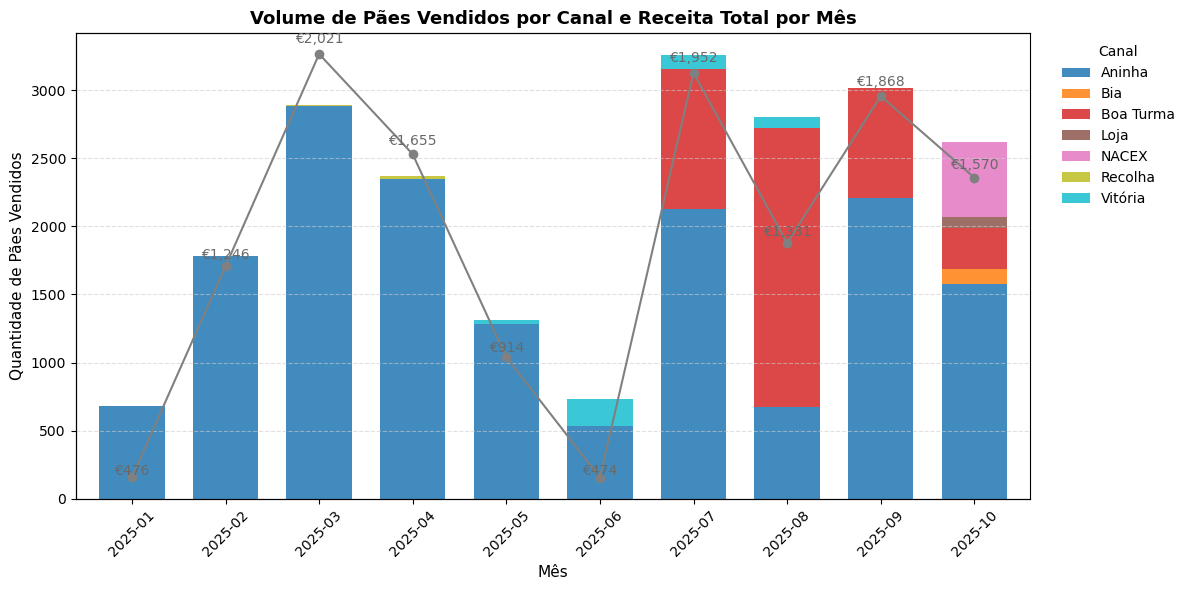

<Figure size 1200x500 with 0 Axes>

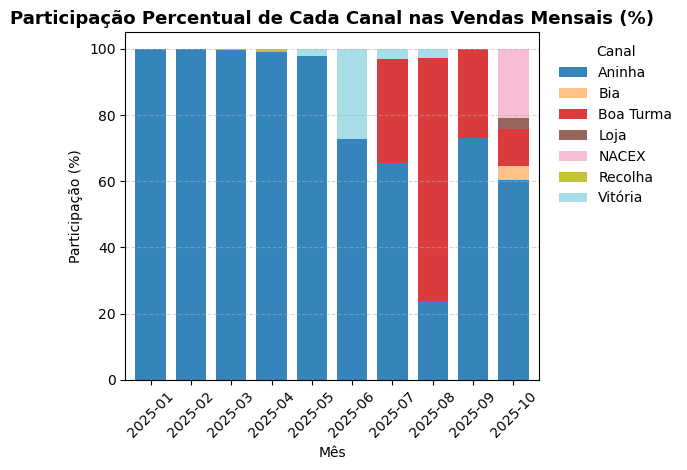

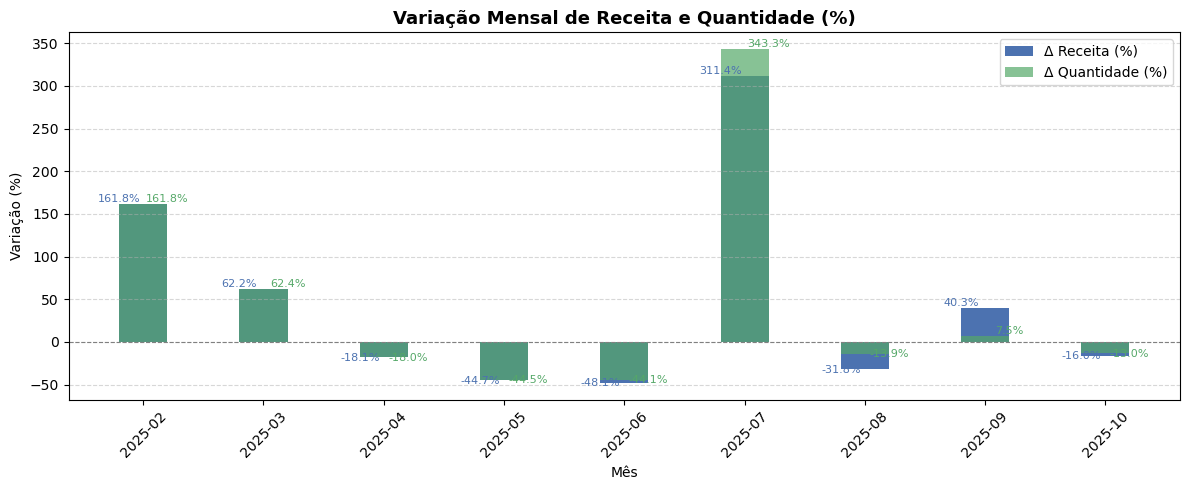

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# ================================
# 🎨 DADOS PARA GRÁFICOS MENSAIS
# ================================

# Pivotar quantidades (para gráfico de barras empilhadas)
pivot_quant = (
    df_mensal.pivot(index="Ano_Mês", columns="Canal", values="Quantidade (pães)")
    .fillna(0)
    .sort_index()
)

# Receita total mensal (para linha de tendência)
pivot_receita = (
    df_mensal.groupby("Ano_Mês")["Receita (€)"]
    .sum()
    .sort_index()
)


# ================================
# 📈 PARTE 1 — QUANTIDADE (BARRAS) + RECEITA (LINHA)
# ================================
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras empilhadas de quantidade
pivot_quant.plot(
    kind="bar",
    stacked=True,
    ax=ax1,
    width=0.7,
    cmap="tab10",  # paleta de cores boa pra canais
    alpha=0.85
)

# Eixo da esquerda — quantidade
ax1.set_ylabel("Quantidade de Pães Vendidos", fontsize=11)
ax1.set_xlabel("Mês", fontsize=11)
ax1.tick_params(axis='x', rotation=45)

# Linhas horizontais pontilhadas e leves
ax1.grid(axis="y", linestyle="--", color="#cccccc", alpha=0.6, linewidth=0.8)
ax1.grid(axis="x", visible=False)

# Legenda
ax1.legend(title="Canal", bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)

# Segundo eixo para receita
ax2 = ax1.twinx()
ax2.plot(pivot_receita.index, pivot_receita.values, color="grey", marker="o", linewidth=1.5, label="Receita Total (€)")

# 🔹 Remove totalmente a aparência do eixo direito
ax2.set_ylabel("")                          # remove nome do eixo
ax2.set_yticks([])                          # remove números
ax2.spines["right"].set_visible(False)      # remove a linha do eixo direito
ax2.tick_params(axis='y', left=False)       # garante que não aparecem marcas

# Adiciona os rótulos de valor da receita nos pontos
for i, val in enumerate(pivot_receita.values):
    ax2.text(i, val + val*0.02, f"€{val:,.0f}", ha='center', fontsize=10, color="dimgray")

# Título e layout final
plt.title("Volume de Pães Vendidos por Canal e Receita Total por Mês", fontsize=13, fontweight="bold")
fig.tight_layout()
plt.show()



# ================================
# 📊 PARTE 2 — PARTICIPAÇÃO PERCENTUAL POR CANAL
# ================================
share_quant = pivot_quant.div(pivot_quant.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 5))
share_quant.plot(
    kind="bar",
    stacked=True,
    colormap="tab20",
    alpha=0.9,
    width=0.75
)
plt.title("Participação Percentual de Cada Canal nas Vendas Mensais (%)", fontsize=13, fontweight="bold")
plt.xlabel("Mês")
plt.ylabel("Participação (%)")
plt.xticks(rotation=45)
plt.legend(title="Canal", bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# ================================
# 📉 PARTE 3 — VARIAÇÃO MENSAL (%)
# ================================

# Dados agregados mensais gerais
mensal_total = (
    df_costed.groupby("Ano_Mês")[["Valor Total (€)", "Quantidade (pães)"]]
    .sum()
    .reset_index()
    .sort_values("Ano_Mês")
)
mensal_total["Δ Receita (%)"] = mensal_total["Valor Total (€)"].pct_change() * 100
mensal_total["Δ Quantidade (%)"] = mensal_total["Quantidade (pães)"].pct_change() * 100

# Gráfico
plt.figure(figsize=(12, 5))
plt.bar(mensal_total["Ano_Mês"], mensal_total["Δ Receita (%)"], width=0.4, label="Δ Receita (%)", color="#4C72B0")
plt.bar(mensal_total["Ano_Mês"], mensal_total["Δ Quantidade (%)"], width=0.4, label="Δ Quantidade (%)", color="#55A868", alpha=0.7)

plt.axhline(0, color="gray", linewidth=0.8, linestyle="--")
plt.title("Variação Mensal de Receita e Quantidade (%)", fontsize=13, fontweight="bold")
plt.xlabel("Mês")
plt.ylabel("Variação (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Adicionar rótulos com valores
for i, (x, val_r, val_q) in enumerate(zip(mensal_total["Ano_Mês"], mensal_total["Δ Receita (%)"], mensal_total["Δ Quantidade (%)"])):
    if not pd.isna(val_r):
        plt.text(i - 0.2, val_r + (2 if val_r >= 0 else -4), f"{val_r:.1f}%", color="#4C72B0", fontsize=8, ha="center")
    if not pd.isna(val_q):
        plt.text(i + 0.2, val_q + (2 if val_q >= 0 else -4), f"{val_q:.1f}%", color="#55A868", fontsize=8, ha="center")

plt.tight_layout()
plt.show()


c:\Users\hmatr\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


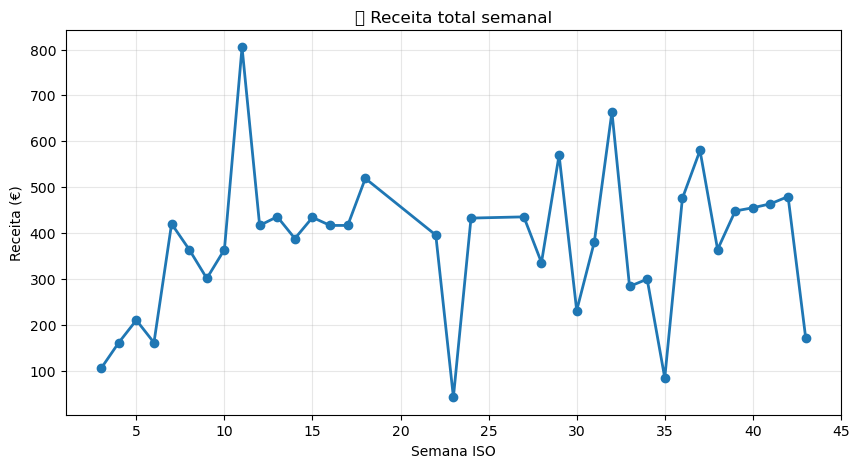

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(resumo_semanal["Semana"], resumo_semanal["Valor Total (€)"], marker="o", linewidth=2)
plt.title("📈 Receita total semanal")
plt.xlabel("Semana ISO")
plt.ylabel("Receita (€)")
plt.grid(True, alpha=0.3)
plt.show()


c:\Users\hmatr\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


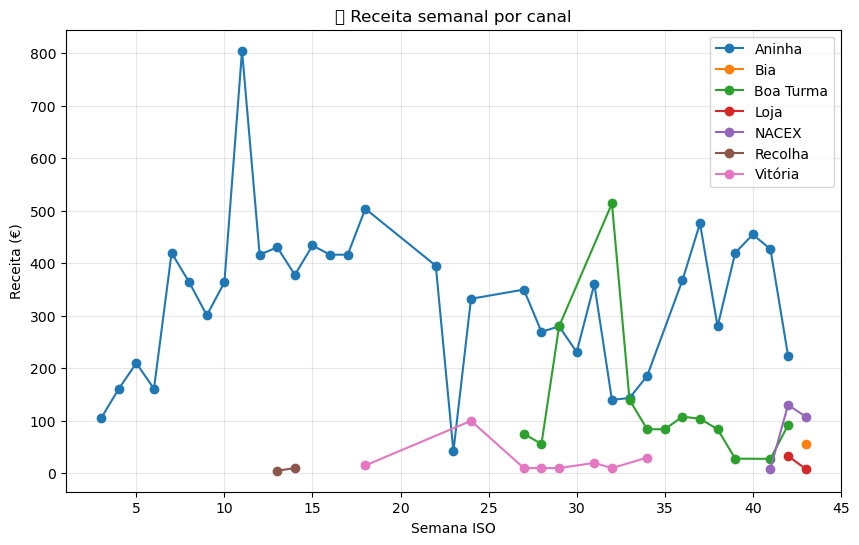

In [ ]:
plt.figure(figsize=(10,6))
for canal, grupo in resumo_canal_semana.groupby("Canal"):
    plt.plot(grupo["Semana"], grupo["Valor Total (€)"], marker="o", label=canal)

plt.title("📊 Receita semanal por canal")
plt.xlabel("Semana ISO")
plt.ylabel("Receita (€)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


C:\Users\hmatr\AppData\Local\Temp\ipykernel_16900\327720689.py:23: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\hmatr\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


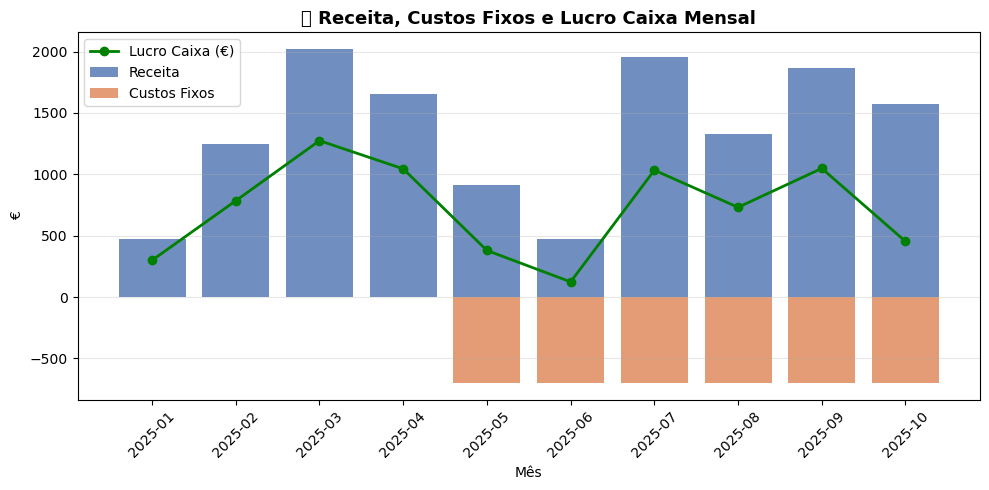

C:\Users\hmatr\AppData\Local\Temp\ipykernel_16900\327720689.py:39: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\hmatr\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


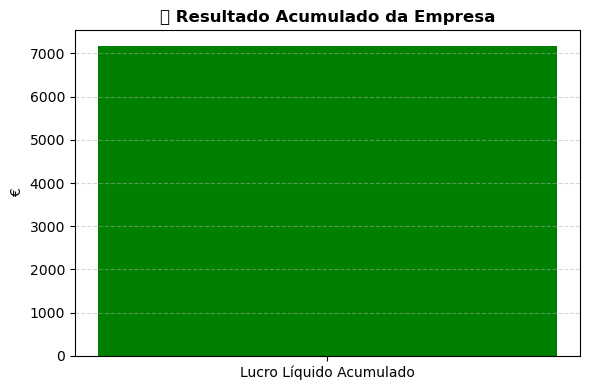

In [ ]:
# ================================
# 💰 GRÁFICO — RECEITA, CUSTOS FIXOS E LUCRO CAIXA MENSAL
# ================================

plt.figure(figsize=(10,5))

# Barras de receita
plt.bar(df_mensal_total["Ano_Mês"], df_mensal_total["Receita (€)"], label="Receita", color="#4C72B0", alpha=0.8)

# Barras de custos fixos (negativas para contraste visual)
plt.bar(df_mensal_total["Ano_Mês"], -df_mensal_total["Custos Fixos (€)"], label="Custos Fixos", color="#DD8452", alpha=0.8)

# Linha de lucro caixa
plt.plot(df_mensal_total["Ano_Mês"], df_mensal_total["Lucro Caixa (€)"], color="green", marker="o", linewidth=2, label="Lucro Caixa (€)")

# Layout
plt.title("💰 Receita, Custos Fixos e Lucro Caixa Mensal", fontsize=13, fontweight="bold")
plt.xlabel("Mês")
plt.ylabel("€")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


# ================================
# 🏁 GRÁFICO — RESULTADO ACUMULADO
# ================================

lucro_acumulado = df_mensal_total["Lucro Caixa (€)"].sum()
cor_barra = "green" if lucro_acumulado > 0 else "red"

plt.figure(figsize=(6,4))
plt.bar(["Lucro Líquido Acumulado"], [lucro_acumulado], color=cor_barra)
plt.title("🏁 Resultado Acumulado da Empresa", fontsize=12, fontweight="bold")
plt.ylabel("€")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
